##ThinkDSP

This notebook contains code solutions to exercises in Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [2]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import numpy as np

%matplotlib inline

In [3]:
wave = thinkdsp.read_wave('179114__sinatra314__elvis-radio-announcer.wav')
segment = wave.segment(start=4, duration=5)
segment.make_audio()

In [4]:
spectrum = segment.make_spectrum()

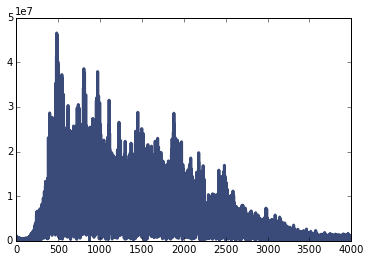

In [5]:
spectrum.plot(high=20000)

In [15]:
out_spectrum.make_wave().make_audio()